In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
from datetime import datetime 

In [33]:
now = datetime.now()
start = datetime(now.year-10, now.month, now.day)
end = now 
ticker = "AAPL"
df = yf.download(ticker, start, end)

C:\Users\91956\AppData\Local\Temp\ipykernel_6544\2611540549.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


In [4]:
df = df.reset_index()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-08-24,23.173706,24.450148,20.674757,21.319720,648825200
1,2015-08-25,23.313028,24.969256,23.259095,24.969256,414406400
2,2015-08-26,24.650148,24.695093,23.607422,24.065861,387098400
3,2015-08-27,25.376015,25.447927,24.724310,25.220955,338464400
4,2015-08-28,25.459164,25.463657,25.065894,25.207470,212657600
...,...,...,...,...,...,...
2510,2025-08-18,230.889999,233.119995,230.110001,231.699997,37476200
2511,2025-08-19,230.559998,232.869995,229.350006,231.279999,39402600
2512,2025-08-20,226.009995,230.470001,225.770004,229.979996,42263900


Text(0, 0.5, 'Close Price')

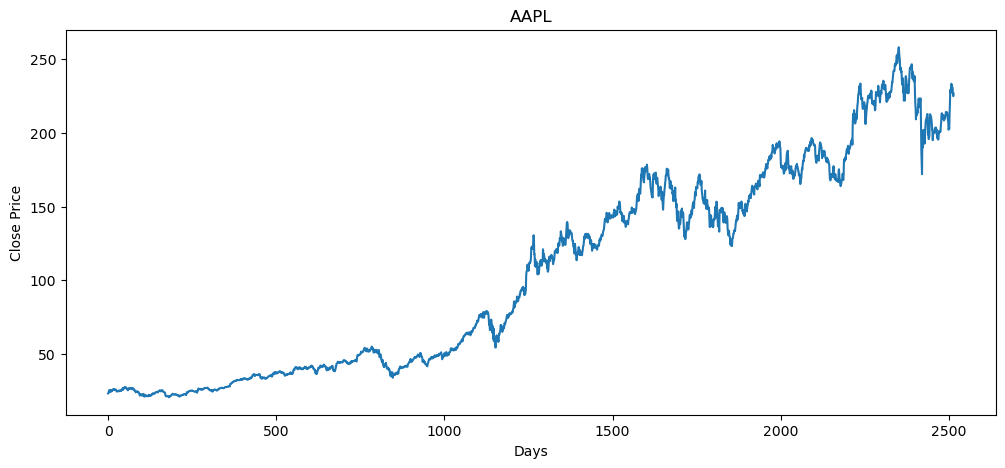

In [5]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel("Days")
plt.ylabel("Close Price")

In [32]:
# Hundred days of moving average
df["MA_100"] = df[("Close", "AAPL")].rolling(100).mean()

KeyError: ('Close', 'AAPL')

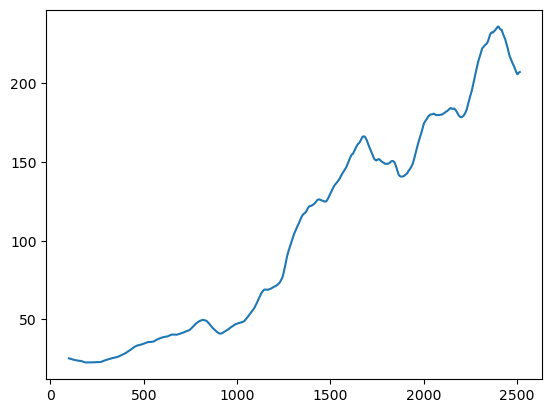

In [7]:
plt.plot(df["MA_100"])

Text(0.5, 0, 'Days')

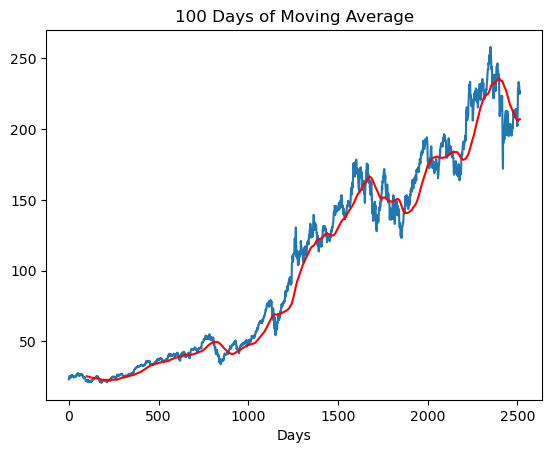

In [8]:
#plotting this against the earlier graph
df = df.droplevel(axis=1, level=1)
plt.plot(df.Close)
plt.plot(df["MA_100"], "r")
plt.title("100 Days of Moving Average")
plt.xlabel("Days")

In [30]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

data_training_array = scaler.fit_transform(data_training)


In [11]:
#sequence creation

x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
import tensorflow as tf

In [14]:
print(tf.__version__)


2.20.0


In [15]:
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Input

model = Sequential()
model.add(LSTM(units=128, activation="tanh", return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\91956\miniconda3\envs\stockenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
#model training

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 183ms/step - loss: 0.0106
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - loss: 5.5860e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - loss: 5.3569e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - loss: 4.8740e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - loss: 4.5970e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - loss: 4.6845e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - loss: 4.3272e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - loss: 4.0343e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - loss: 5.1283e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - loss: 3.8891e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - loss: 3.8227e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - loss: 4.1180e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - loss: 4.0024e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - loss: 3.4260e-04

In [18]:
model.save("stock_prediction_model.keras")


In [19]:
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)


,Close
0,172.378113
1,175.676453
2,174.508301
3,171.406235
4,171.111771
...,...
850,230.889999
851,230.559998
852,226.009995
853,224.899994


In [28]:
input_data = scaler.fit_transform(final_df)

In [21]:
x_test = []
y_test= []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [23]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step


In [25]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

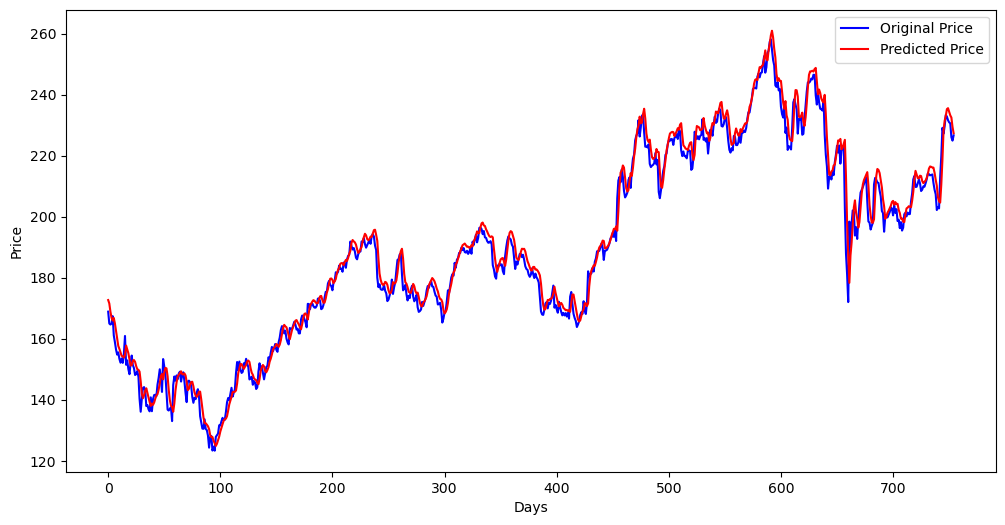

In [27]:
plt.figure(figsize = (12,6))
plt.plot(y_test, "b", label = "Original Price")
plt.plot(y_predicted, "r", label = "Predicted Price")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()